# Supervised Learning

Supervised learning is a type of machine learning where an algorithm is trained on a labeled dataset, meaning each input in the data is paired with its corresponding correct output. The goal is for the algorithm to learn the relationship between the inputs and outputs so it can accurately predict outcomes for new, unseen data.


## Classification with Logistic Regression

The model learns to assign input data points to one of several predefined, discrete categories or "classes."

The model is trained on a dataset where each input already has a correct class label, allowing it to learn the patterns and characteristics that differentiate the classes. Once trained, the model can then predict the appropriate class label for new, unseen data.

In [ ]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Data

The data used here is the "Obesity Risk Prediction" data set publically available on <a href="https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition">UCI Library</a> under the <a href="https://creativecommons.org/licenses/by/4.0/legalcode">CCA 4.0</a> license.

The data set has 17 attributes in total along with 2,111 samples.

The attributes of the dataset are descibed below.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Variable Name</th>
    <th class="tg-7zrl">Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Gender</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Age</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Height</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Weight</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">family_history_with_overweight</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Has a family member suffered or suffers from overweight?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAVC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you eat high caloric food frequently?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FCVC</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">Do you usually eat vegetables in your meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NCP</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How many main meals do you have daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CAEC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Do you eat any food between meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SMOKE</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you smoke?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CH2O</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How much water do you drink daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SCC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you monitor the calories you eat daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAF</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How often do you have physical activity?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">TUE</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">How much time do you use technological devices such as cell phone, videogames, television, computer and others?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CALC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">How often do you drink alcohol?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">MTRANS</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Which transportation do you usually use?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NObeyesdad</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Obesity level</td>
  </tr>
</tbody></table>


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

### Explore and Analyse

In [ ]:
# Checking for null values
print(X.isnull().sum())

# Dataset summary
print(X.info())
print(X.describe())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64

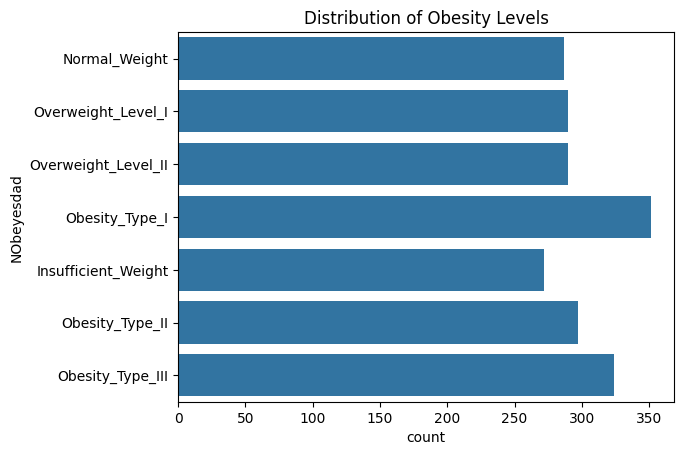

In [ ]:
# Distribution of target variable
sns.countplot(y='NObeyesdad', data=y)
plt.title('Distribution of Obesity Levels')
plt.show()

### Preprocess

Scale the numerical features to standardize their ranges for better model performance.

In [ ]:
# Standardizing continuous numerical features
continuous_columns = X.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X[continuous_columns])

# Converting to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combining with the original dataset
scaled_data = pd.concat([X.drop(columns=continuous_columns), scaled_df], axis=1)

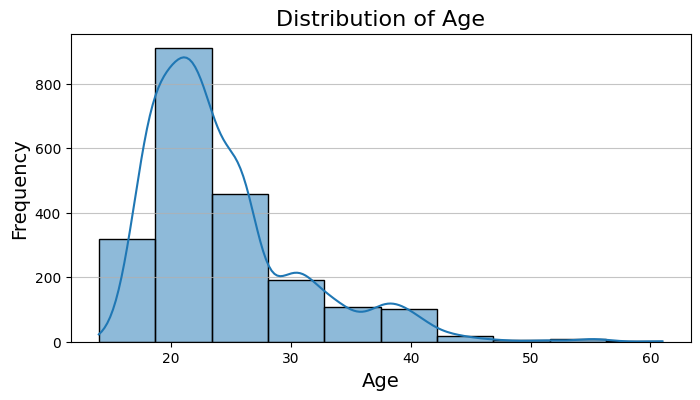

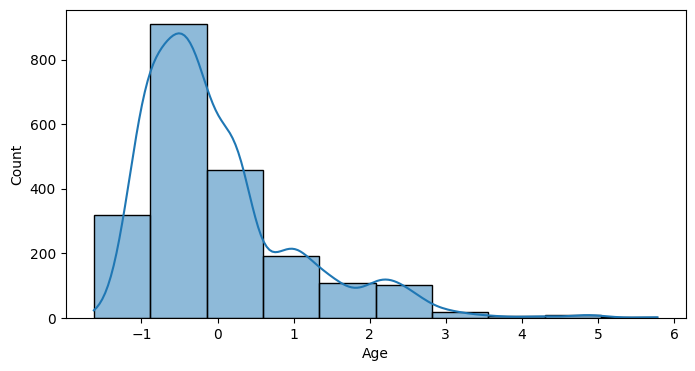

In [ ]:
# Create the histogram
plt.figure(figsize=(8, 4)) # Adjust figure size as needed
sns.histplot(X['Age'], bins=10, kde=True) # `bins` controls the number of bars, `kde=True` adds a Kernel Density Estimate line

# Add titles and labels
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a grid for better readability (optional)
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()


# Create the histogram
plt.figure(figsize=(8, 4)) # Adjust figure size as needed
sns.histplot(scaled_data['Age'], bins=10, kde=True) # `bins` controls the number of bars, `kde=True` adds a Kernel Density Estimate line

# Show the plot
plt.show()

**One-hot encoding**


Convert categorical variables into numerical format using one-hot encoding.

In [ ]:
# Identifying categorical columns
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()

# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

In [ ]:
# Encoding the target variable

prepped_y = pd.DataFrame(index=y.index)
prepped_y['NObeyesdad'] = y['NObeyesdad'].astype('category').cat.codes
prepped_y.head()

,NObeyesdad
0,1
1,1
2,1
3,5
4,6


In [ ]:
# --- Create a combined table for the mapping ---
# Get the original categorical object to access the categories and their codes
# The .cat.categories attribute gives you the original string labels
original_categories = y['NObeyesdad'].astype('category')

# Create a mapping from code to original label (for completeness, though not directly used below)
# category_mapping = dict(enumerate(original_categories.cat.categories))

# Create the comparison DataFrame
comparison_table = pd.DataFrame({
    'Original_NObeyesdad': y['NObeyesdad'],
    'Encoded_NObeyesdad': prepped_y['NObeyesdad']
})

# Show the full mapping to see which number corresponds to which string
print("\nFull Encoding Mapping:")
# This leverages the categorical data type's internal mapping
mapping_df = pd.DataFrame({
    'Category': original_categories.cat.categories,
    'Code': original_categories.cat.codes.unique()
}).sort_values(by='Code').reset_index(drop=True)
print(mapping_df.to_string(index=False))


Full Encoding Mapping:
           Category  Code
   Obesity_Type_III     0
Insufficient_Weight     1
    Obesity_Type_II     2
 Overweight_Level_I     3
Overweight_Level_II     4
      Normal_Weight     5
     Obesity_Type_I     6


### Model Training and Evaluation

In [ ]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(prepped_data, prepped_y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Present the number of observations in each part

print(f"Number of observations in X_train: {X_train.shape[0]}")
print(f"Number of observations in y_train: {y_train.shape[0]}")
print(f"Number of observations in X_test:  {X_test.shape[0]}")
print(f"Number of observations in y_test:  {y_test.shape[0]}")

Number of observations in X_train: 1688
Number of observations in y_train: 1688
Number of observations in X_test:  423
Number of observations in y_test:  423


#### Logistic Regression with One-vs-All

* The algorithm trains a single binary classifier for each class.
* Each classifier learns to distinguish a single class from all the others combined.
* If there are k classes, k classifiers are trained.
* During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class.

##### Advantages:
* Simpler and more efficient in terms of the number of classifiers (k)
* Easier to implement for algorithms that naturally provide confidence scores (e.g., logistic regression, SVM).

##### Disadvantages:
* Classifiers may struggle with class imbalance since each binary classifier must distinguish between one class and the rest.
* Requires the classifier to perform well even with highly imbalanced datasets, as the "all" group typically contains more samples than the "one" class.

In [ ]:
# Training logistic regression model using One-vs-All (default)

model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [ ]:
# Predictions
y_pred_ova = model_ova.predict(X_test)

# Evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")

One-vs-All (OvA) Strategy
Accuracy: 76.12%


#### Logistic Regression with One-vs-One

* The algorithm trains a binary classifier for every pair of classes in the dataset.
* If there are k classes, this results in $k(k-1)/2$ classifiers.
* Each classifier is trained to distinguish between two specific classes, ignoring the rest.
* During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons.

##### Advantages:
* Suitable for algorithms that are computationally expensive to train on many samples because each binary classifier deals with a smaller dataset (only samples from two classes).
* Can be more accurate in some cases since classifiers focus on distinguishing between two specific classes at a time.

##### Disadvantages:
* Computationally expensive for datasets with a large number of classes due to the large number of classifiers required.
* May lead to ambiguous predictions if voting results in a tie.

In [ ]:
# Training logistic regression model using One-vs-One

model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [ ]:
# Predictions
y_pred_ovo = model_ovo.predict(X_test)

# Evaluation metrics for OvO
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")

One-vs-One (OvO) Strategy
Accuracy: 92.2%


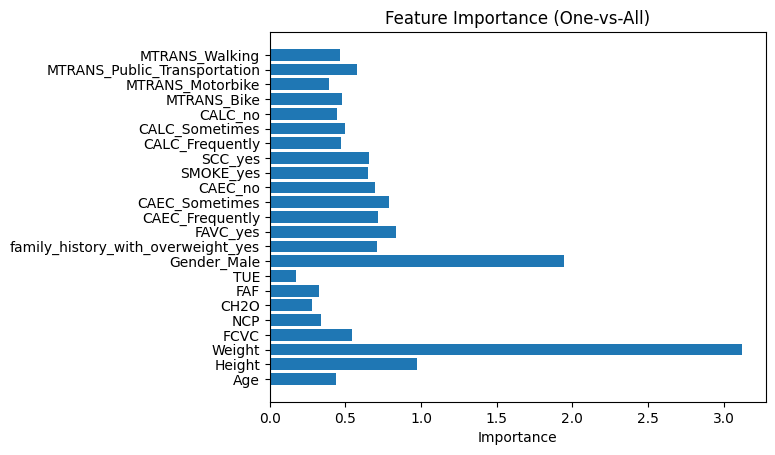

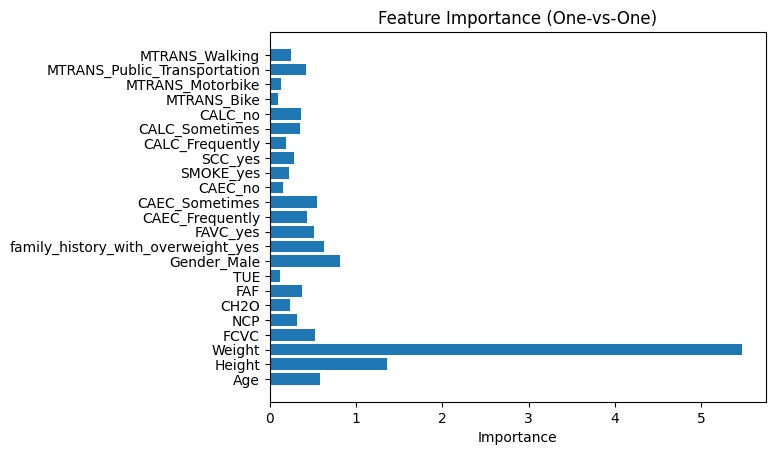

In [ ]:
# Feature importance
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(prepped_data.columns, feature_importance)
plt.title("Feature Importance (One-vs-All)")
plt.xlabel("Importance")
plt.show()

# For One vs One model
# Collect all coefficients from each underlying binary classifier
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])

# Now take the mean across all those classifiers
feature_importance = np.mean(np.abs(coefs), axis=0)

# Plot feature importance
plt.barh(prepped_data.columns, feature_importance)
plt.title("Feature Importance (One-vs-One)")
plt.xlabel("Importance")
plt.show()

## Classification with Decision Trees

A Decision Tree is a supervised machine learning algorithm that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It works by recursively splitting the dataset into smaller subsets based on feature values, creating a set of rules (decisions) that lead to a final prediction (leaf node), which can be either a class label for classification tasks or a numerical value for regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [ ]:
# Import the required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Data

This data is about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Drug Y.

We are building a model to find out which drug might be appropriate for a future patient with that illness.

The features of this dataset are the Age, Sex, Blood Pressure, and Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of a multiclass classifier, and we can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient or to prescribe a drug to a new patient.

In [ ]:
# Download the Data

path= 'https://raw.githubusercontent.com/ElsonFilho/Python_ML/refs/heads/main/data/drug200.csv'
my_data = pd.read_csv(path)
my_data.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
65,68,F,NORMAL,NORMAL,27.050,drugY
77,26,F,HIGH,NORMAL,19.161,drugY
62,67,M,LOW,NORMAL,20.693,drugY
168,51,F,LOW,NORMAL,23.003,drugY
47,68,M,LOW,HIGH,10.291,drugC
183,36,F,HIGH,NORMAL,15.490,drugY
90,62,M,NORMAL,HIGH,16.594,drugY
86,51,F,NORMAL,HIGH,13.597,drugX
171,45,M,LOW,NORMAL,10.017,drugX
1,47,M,LOW,HIGH,13.093,drugC


### Data Analysis and pre-processing

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


As we can see 4 of the 6 features of this dataset are categorical.

Let's converted them into numerical ones to be used for modeling.

For this, we can make use of LabelEncoder from the Scikit-Learn library.

In [ ]:
label_encoder = LabelEncoder()
my_data['Sex'] = label_encoder.fit_transform(my_data['Sex'])
my_data['BP'] = label_encoder.fit_transform(my_data['BP'])
my_data['Cholesterol'] = label_encoder.fit_transform(my_data['Cholesterol'])
my_data.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
49,28,0,1,0,19.796,drugY
180,22,0,0,1,22.818,drugY
81,64,1,2,0,7.761,drugX
92,29,0,0,0,29.450,drugY
151,68,1,0,0,11.009,drugB
114,20,0,2,1,9.281,drugX
140,49,1,0,1,6.269,drugA
175,73,0,0,0,18.348,drugY
44,50,0,2,1,12.295,drugX
147,26,0,0,1,12.307,drugA


We have now 5 parameters that can be used for modeling and 1 feature as the target variable.

We can see from comparison of the data before Label encoding and after it, to note the following mapping.
<br>
'Sex' : $M \rightarrow 1, F \rightarrow 0$ <br>
'BP' : $High \rightarrow 0, Low \rightarrow 1, Normal \rightarrow 2$<br>
Cholesterol' : $High \rightarrow 0, Normal \rightarrow 1$

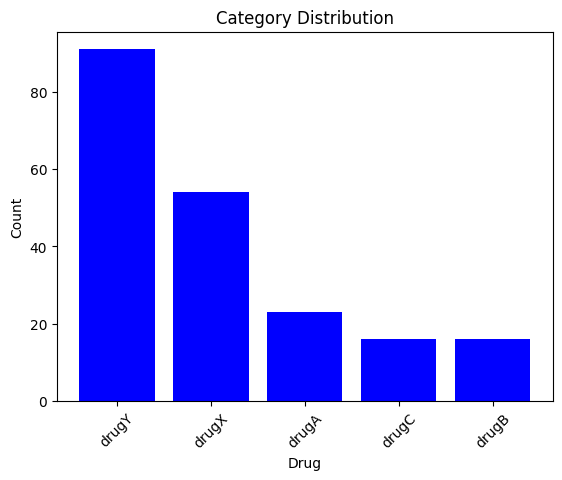

In [ ]:
category_counts = my_data['Drug'].value_counts()

# Plot the count plot
plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

### Modeling

In [ ]:
# Separate the target variable from the input variables.

y = my_data['Drug']
X = my_data.drop(['Drug'], axis=1)

In [ ]:
# Split the dataset into training and testing using train_test_split()
# We can use of 30% for testing and the rest for training the Decision tree.

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=32)

In [ ]:
# Define the Decision tree classifier

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
# Training

drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Evaluation

In [ ]:
tree_predictions = drugTree.predict(X_testset)

print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  0.9833333333333333


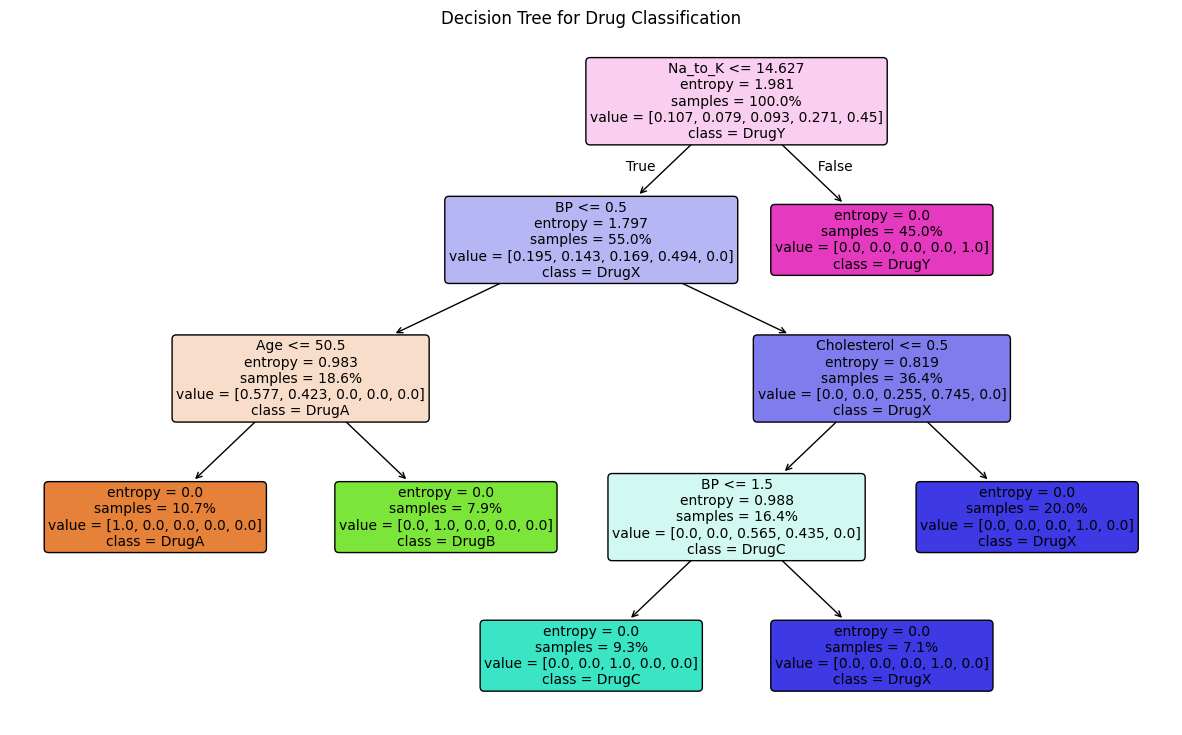

In [ ]:
# Decision Tree Visualization using plot_tree
feature_names = X.columns.tolist()
class_names = ['DrugA', 'DrugB', 'DrugC', 'DrugX', 'DrugY']

plt.figure(figsize=(15, 9)) # Adjust figure size for better visibility, especially with deep trees
plot_tree(
    drugTree,
    feature_names=feature_names, # Use actual feature names
    class_names=class_names,     # Use actual class names (e.g., 'DrugA', 'DrugY')
    filled=True,                 # Color nodes to indicate majority class
    rounded=True,                # Round node boxes
    proportion=True,             # Show the proportion of samples instead of count
    fontsize=10                  # Adjust font size for readability
)
plt.title("Decision Tree for Drug Classification", fontsize=12)
plt.show()

## Regression Trees <a id="RegTree"></a>

A Regression Tree is a type of Decision Tree used for predicting continuous numerical values (like house prices, temperature, or a patient's length of stay in a hospital), rather than classifying data into discrete categories. It works by recursively splitting the dataset into smaller, more homogeneous regions based on input features, until each "leaf" node contains observations with a relatively similar target value. The prediction for any new observation that falls into a particular leaf node is typically the average (mean) of the target values of all training observations within that same leaf.

In [ ]:
# Import Libraries

from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Data

Each row in the dataset represents a taxi trip.

Our objective is to train a model that uses the other variables to predict the value of the *tip_amount*.

In [ ]:
url = 'https://raw.githubusercontent.com/ElsonFilho/Python_ML/refs/heads/main/data/yellow-tripdata.csv'
raw_data = pd.read_csv(url)
raw_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


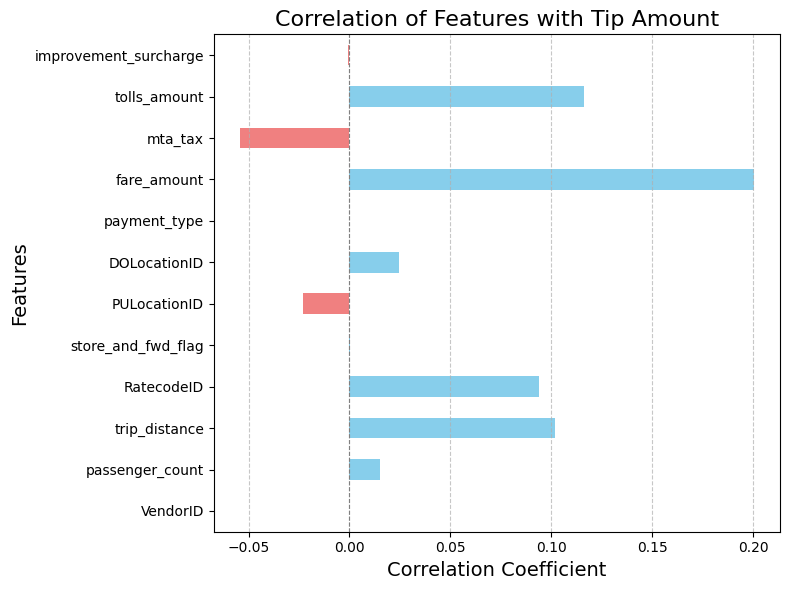

In [ ]:
# Correlation

correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')

# Plotting the horizontal bar chart

plt.figure(figsize=(8, 6)) # Adjust figure size as needed
colors = ['skyblue' if x > 0 else 'lightcoral' for x in correlation_values.values]
correlation_values.plot(kind='barh', color=colors)

plt.title('Correlation of Features with Tip Amount', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Add a vertical line at 0 for easy interpretation
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.8)

# Add grid for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Preprocessing

In [ ]:
# Drop unnecessary features

raw_data = raw_data.drop(['payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge'], axis=1)

In [ ]:
y = raw_data[['tip_amount']].values.astype('float32')

# drop the target variable from the feature matrix
proc_data = raw_data.drop(['tip_amount'], axis=1)

# get the feature matrix used for training
X = proc_data.values

# normalize the feature matrix
X = normalize(X, axis=1, norm='l1', copy=False)

### Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=4,
                               random_state=35)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=35)

### Evaluate

In [ ]:
# Test
y_pred = dt_reg.predict(X_test)

# Evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print('MSE: {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2: {0:.3f}'.format(r2_score))

MSE: 24.468
R^2: 0.031


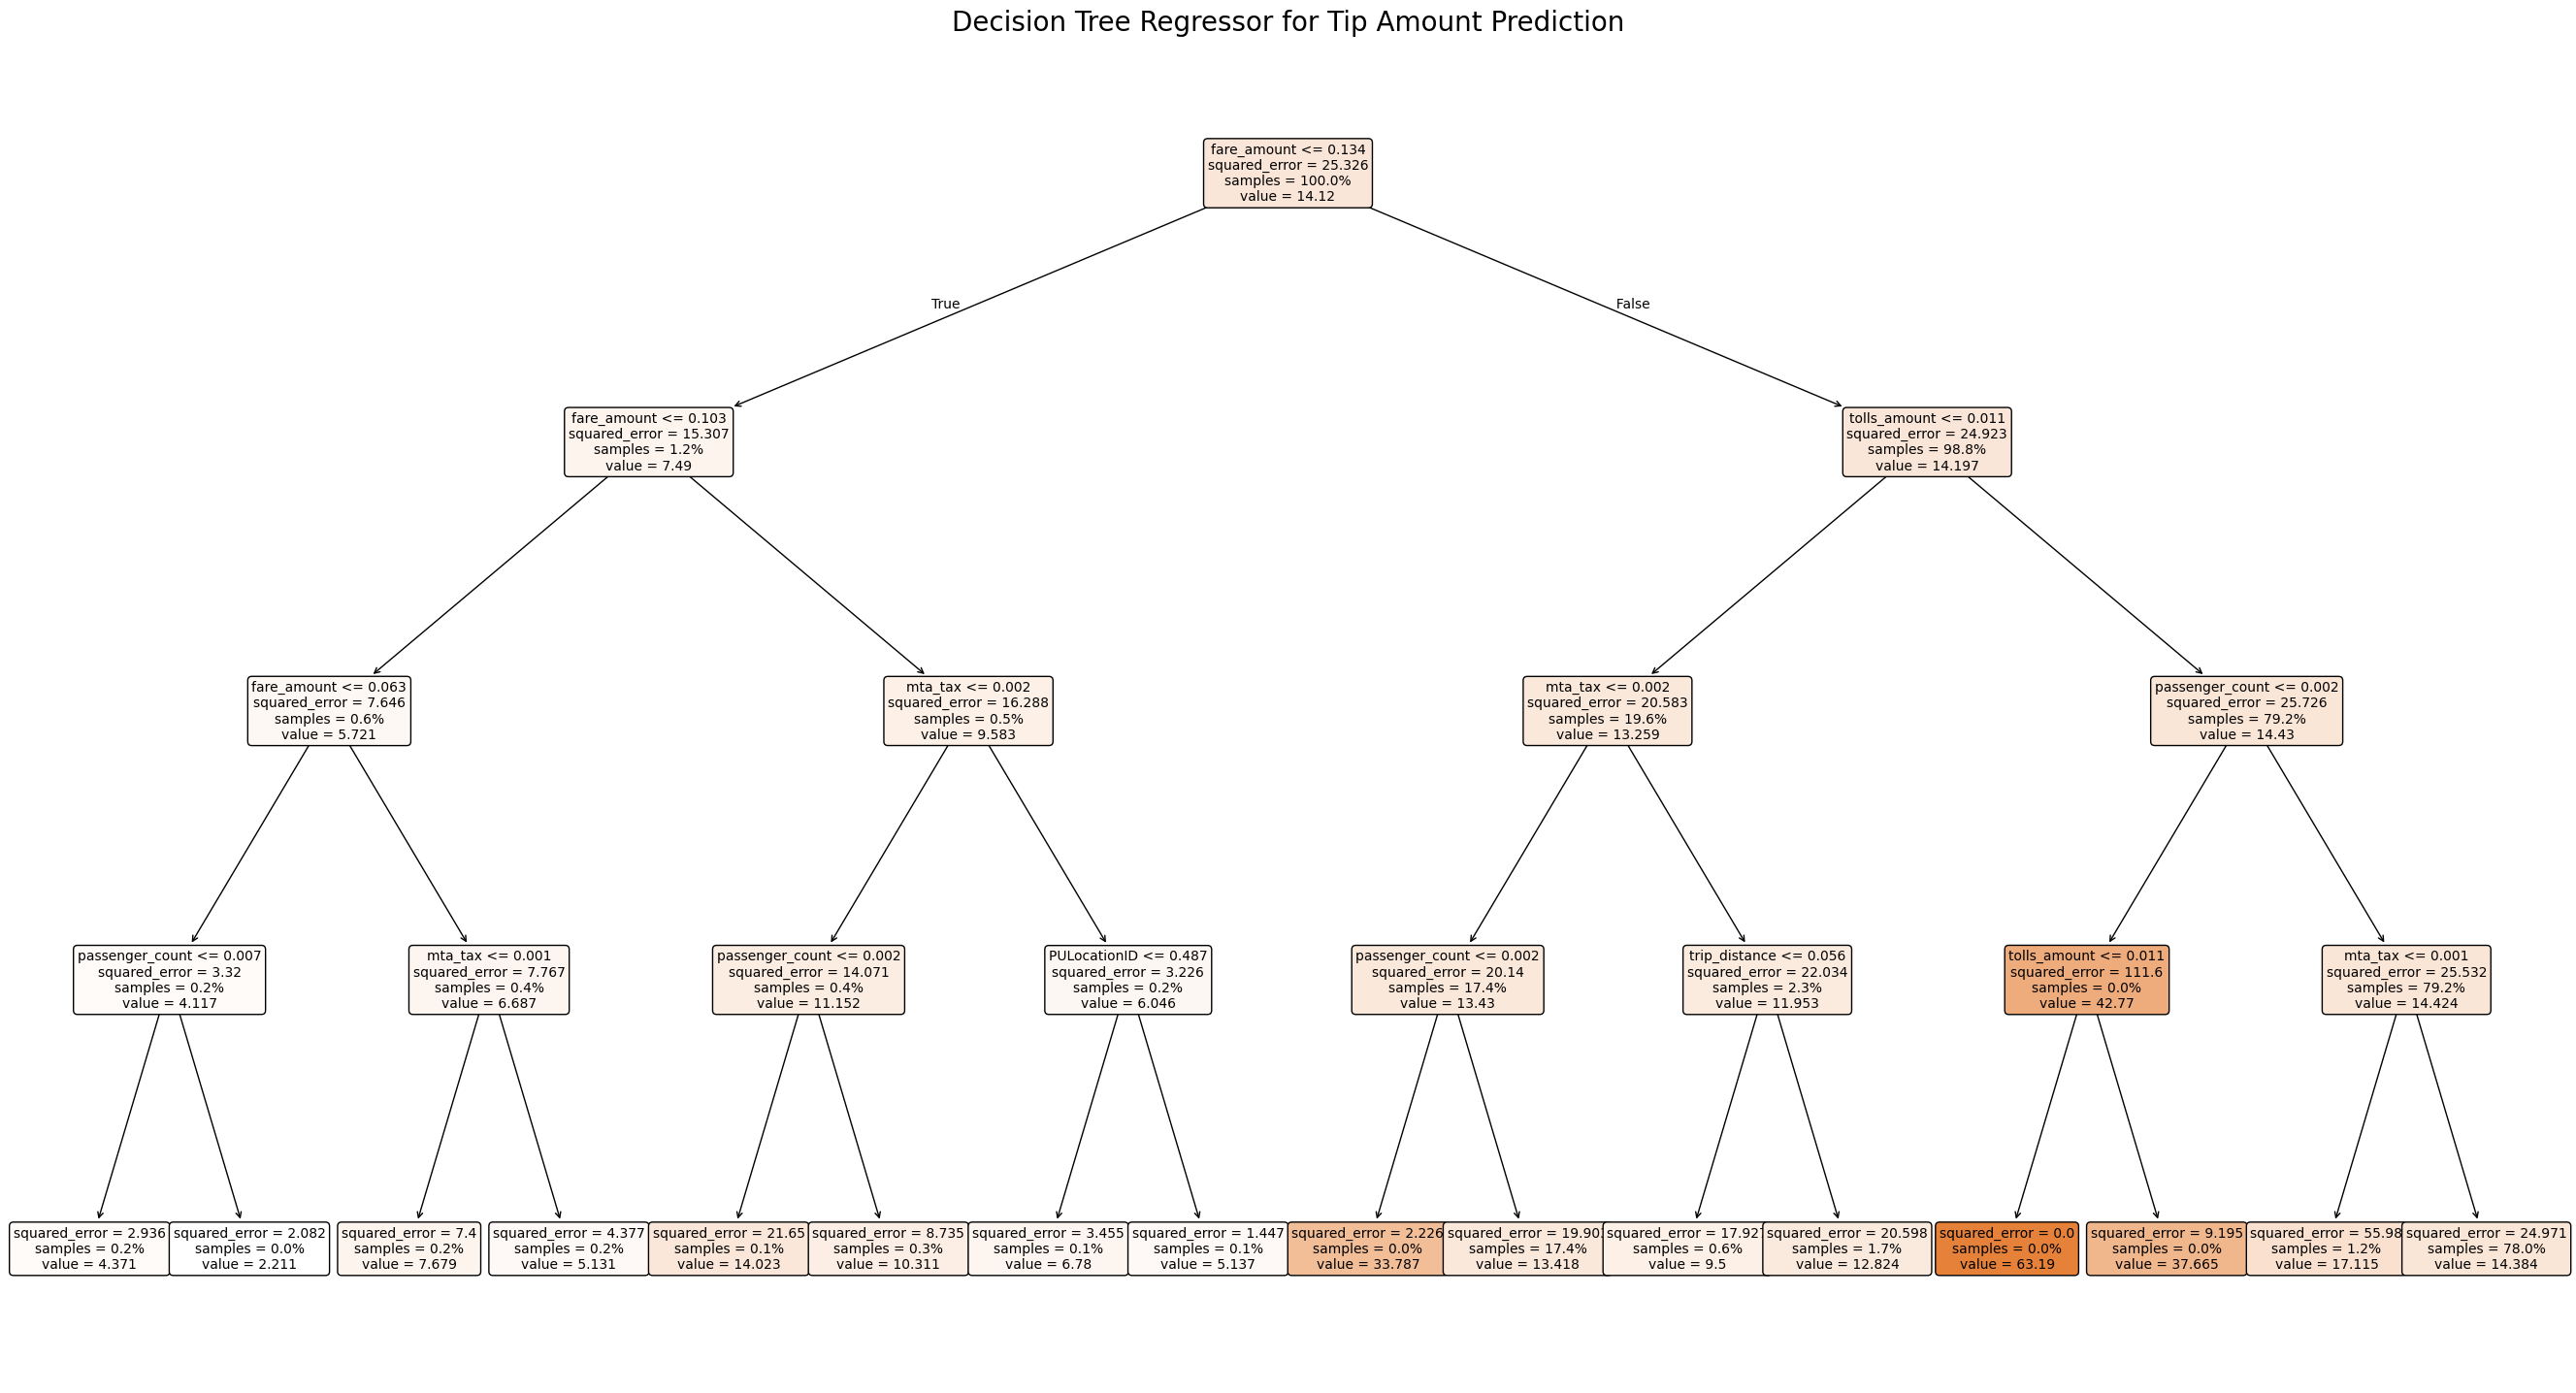

In [ ]:
# Visualize the Regression Tree using plot_tree

# Get feature names from your training data
feature_names = raw_data.columns.tolist()

plt.figure(figsize=(34, 18)) # Adjust figure size for better readability of a deep tree
plot_tree(
    dt_reg,
    feature_names=feature_names, # Use actual feature names
    filled=True,                 # Color nodes based on purity (variance reduction in regression)
    rounded=True,                # Round node boxes
    proportion=True,             # Show the proportion of samples instead of count
    fontsize=10,                 # Adjust font size for readability
    impurity=True                # Show the impurity (e.g., squared_error) for each node
)
plt.title("Decision Tree Regressor for Tip Amount Prediction", fontsize=20)
plt.show()

## Support Vector Machines (SVM)

A SVM is a supervised machine learning algorithm primarily used for classification (but it can also be used for regression).

Its core idea is to find an optimal hyperplane in a high-dimensional space that distinctly separates data points belonging to different classes with the largest possible margin. The data points closest to this hyperplane, which are crucial for defining the margin, are called support vectors.

SVMs can handle both linearly separable and non-linearly separable data by using a technique called the "kernel trick" to implicitly map inputs into higher-dimensional feature spaces.

In [ ]:
# Import Libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

### Data


In [ ]:
# download the dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
raw_data=pd.read_csv(url)
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. Your objective will be to train a model that uses the other variables to predict the value of the Class variable. Let's first retrieve basic statistics about the target variable.

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise.

For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.

### Analysis

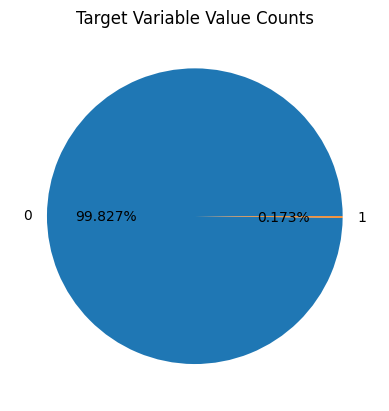

In [ ]:
# get the set of distinct classes
labels = raw_data.Class.unique()

# get the count of each class
sizes = raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent).

Thus, we need to model a binary classification.

The dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model.

One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train time.

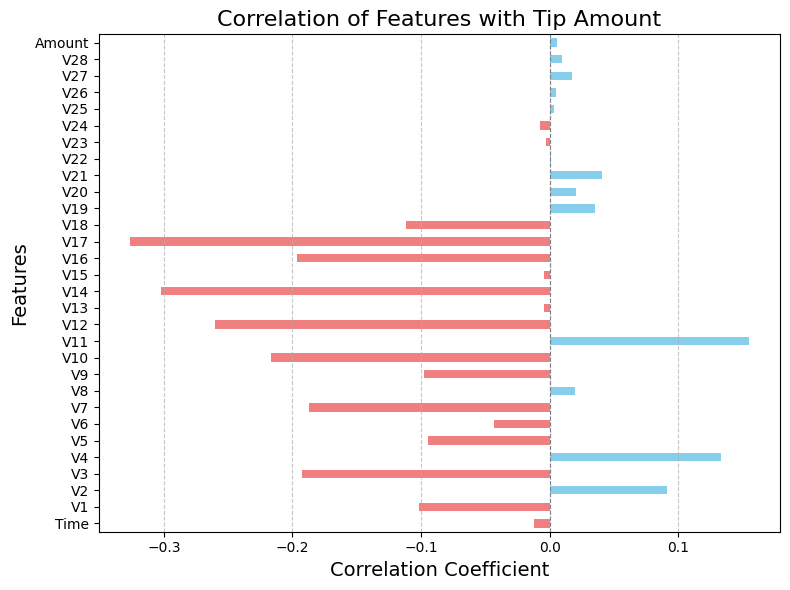

In [ ]:
# Correlation

correlation_values = raw_data.corr()['Class'].drop('Class')

# Plotting the horizontal bar chart

plt.figure(figsize=(8, 6)) # Adjust figure size as needed
colors = ['skyblue' if x > 0 else 'lightcoral' for x in correlation_values.values]
correlation_values.plot(kind='barh', color=colors)

plt.title('Correlation of Features with Tip Amount', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Add a vertical line at 0 for easy interpretation
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.8)

# Add grid for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

This clearly shows that some features affect the output Class more than the others. For efficient modeling, we may selöect only the most correlated features.

### Preprocessing

In [ ]:
# standardize features by removing the mean and scaling to unit variance
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

### Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training

#### Decision Tree Classifier model

In [ ]:
# Compute the sample weights to be used as input to the train routine,
# so that it takes into account the class imbalance present in this dataset.

w_train = compute_sample_weight('balanced', y_train)

In [ ]:
# Train

dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [ ]:
# Evaluate

y_pred_dt = dt.predict_proba(X_test)[:,1]

roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC: {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC: 0.939


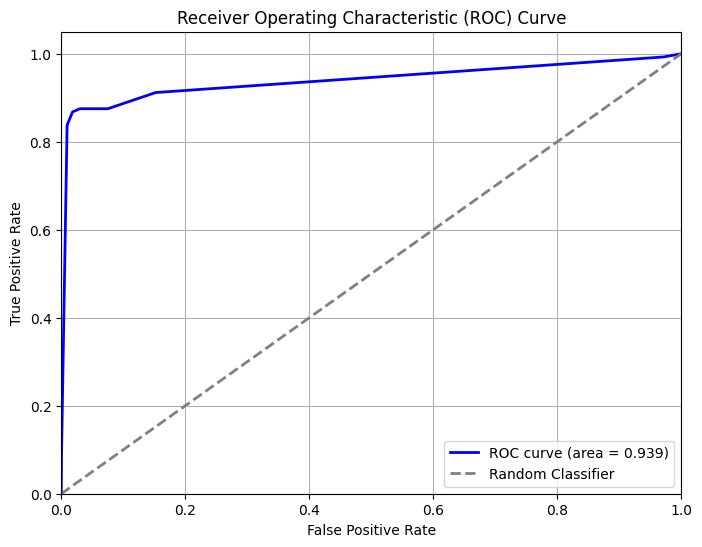

In [ ]:
# Plotting the ROC Curve

# Calculate ROC curve points (FPR and TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='Blue', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier') # Diagonal random classifier line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

We can evaluate the Area Under the Receiver Operating Characteristic Curve (ROC-AUC) score as a metric of model performance.

The AUC-ROC score evaluates the model's ability to distinguish positive and negative classes considering all possible probability thresholds.

The higher its value, the better the model is considered for separating the two classes of values.

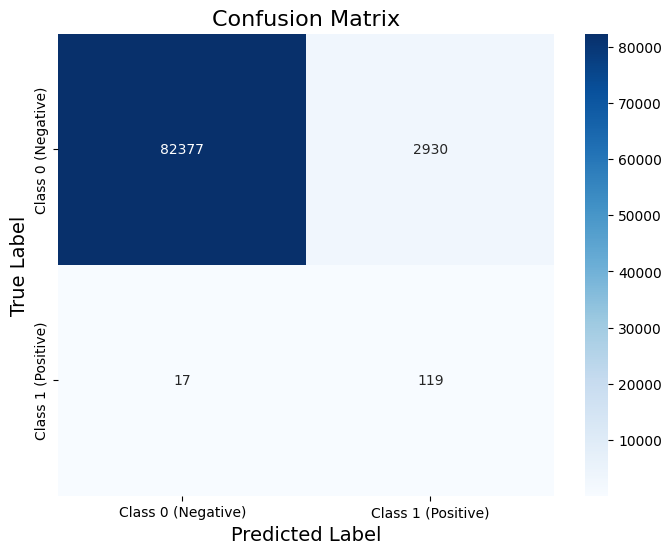

In [ ]:
# Plotting the Confusion Matrix

y_pred_dt_classes = dt.predict(X_test)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt_classes)

# Define class labels for better readability in the plot
# Assuming 0 is 'Negative' class and 1 is 'Positive' class.
# Adjust these based on your actual class meanings.
class_labels = ['Class 0 (Negative)', 'Class 1 (Positive)']

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,      # Annotate cells with the numeric value
    fmt='d',         # Format annotations as integers
    cmap='Blues',    # Colormap (e.g., 'Blues', 'Greens', 'YlGnBu')
    cbar=True,       # Show color bar
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_classes, target_names=class_labels))


Classification Report:
                    precision    recall  f1-score   support

Class 0 (Negative)       1.00      0.97      0.98     85307
Class 1 (Positive)       0.04      0.88      0.07       136

          accuracy                           0.97     85443
         macro avg       0.52      0.92      0.53     85443
      weighted avg       1.00      0.97      0.98     85443



#### SVM model

In [ ]:
# Train
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [ ]:
# Evaluate

y_pred_svm = svm.decision_function(X_test)

roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986


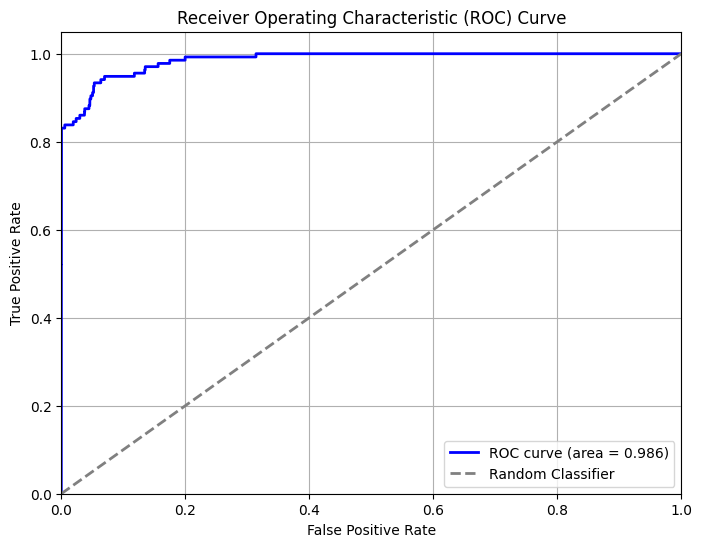

In [ ]:
# Plotting the ROC Curve

# Calculate ROC curve points (FPR and TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='Blue', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier') # Diagonal random classifier line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

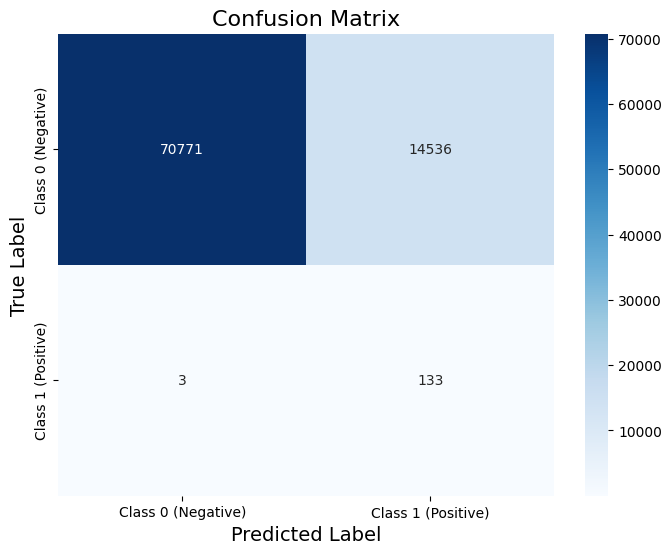

In [ ]:
# Plotting the Confusion Matrix

y_pred_svm_classes = svm.predict(X_test)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm_classes)

# Define class labels for better readability in the plot
# Assuming 0 is 'Negative' class and 1 is 'Positive' class.
# Adjust these based on your actual class meanings.
class_labels = ['Class 0 (Negative)', 'Class 1 (Positive)']

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,      # Annotate cells with the numeric value
    fmt='d',         # Format annotations as integers
    cmap='Blues',    # Colormap (e.g., 'Blues', 'Greens', 'YlGnBu')
    cbar=True,       # Show color bar
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

## K-Nearest Neighbors Classifier

The K-Nearest Neighbors (KNN) classifier is a non-parametric, instance-based learning algorithm that classifies a data point based on the majority class among its 'k' nearest neighbors in the feature space.

When predicting the class of a new, unseen data point, KNN calculates the distance between this point and all other training points. It then identifies the 'k' training points that are closest to the new point (its "neighbors").Finally, the new data point is assigned the class label that is most frequent among these 'k' neighbors.

The "k" in KNN is a user-defined integer, and the choice of 'k' can significantly impact the classifier's performance.

In [ ]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

### Data

A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups.
1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

Demographic data , such as region, age, and marital, can be used to predict group membership, so the company can customize offers for individual prospective customers. The target field, called *custcat*, has four possible service categories that correspond to the four customer groups.

Our objective is to build a classifier to predict the service category for unknown cases. We will use **K-Nearest Neighbor Classifier**.

In [ ]:
# Load the Data

df = pd.read_csv('https://raw.githubusercontent.com/ElsonFilho/Python_ML/refs/heads/main/data/teleCust1000t.csv')
df.sample(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
343,3,71,52,0,17,172.0,2,32,0.0,0,1,4
652,2,37,42,0,10,115.0,1,22,0.0,1,1,3
383,1,23,20,0,1,15.0,3,0,0.0,1,1,2
197,2,65,65,1,27,128.0,3,24,0.0,0,2,3
85,2,33,27,1,7,46.0,2,7,0.0,0,4,1
316,1,13,45,1,3,99.0,3,8,0.0,1,2,3
506,1,49,54,0,24,30.0,2,5,0.0,0,1,2
687,2,10,40,0,6,22.0,3,6,0.0,1,1,1
917,3,70,68,0,21,1131.0,2,45,0.0,0,1,3
736,3,28,50,1,7,25.0,1,3,0.0,0,2,1


### Data Visualization and Analysis

In [ ]:
custcat_counts = df['custcat'].value_counts()
custcat_counts = custcat_counts.sort_index()
custcat_counts

,count
custcat,
1,266
2,217
3,281
4,236


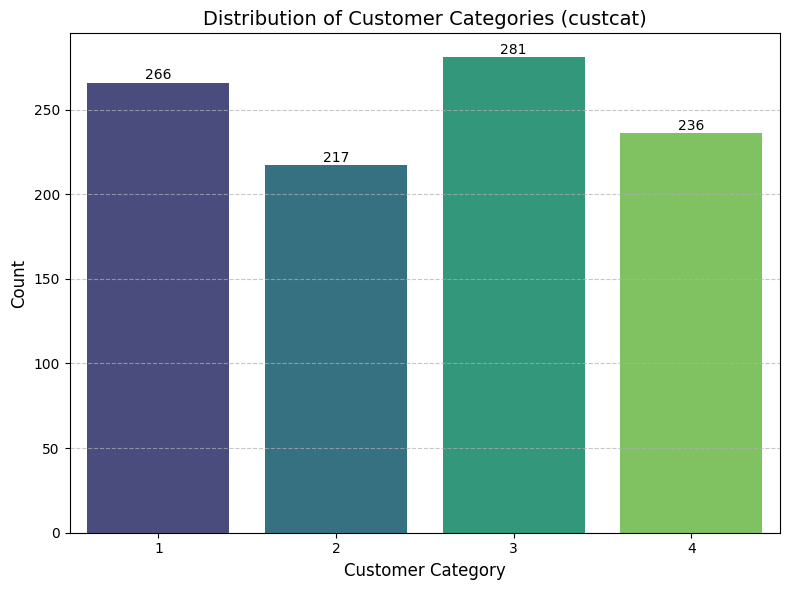

In [ ]:
# Create a bar chart using Seaborn
plt.figure(figsize=(8, 6)) # Set the figure size using Matplotlib
sns.barplot(
    x=custcat_counts.index.astype(str), # X-axis: customer categories (converted to string)
    y=custcat_counts.values,          # Y-axis: counts
    palette='viridis'                 # Choose a color palette
)

# Add labels and title using Matplotlib functions
plt.title('Distribution of Customer Categories (custcat)', fontsize=14)
plt.xlabel('Customer Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count values on top of the bars
for i, count in enumerate(custcat_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

<Axes: >

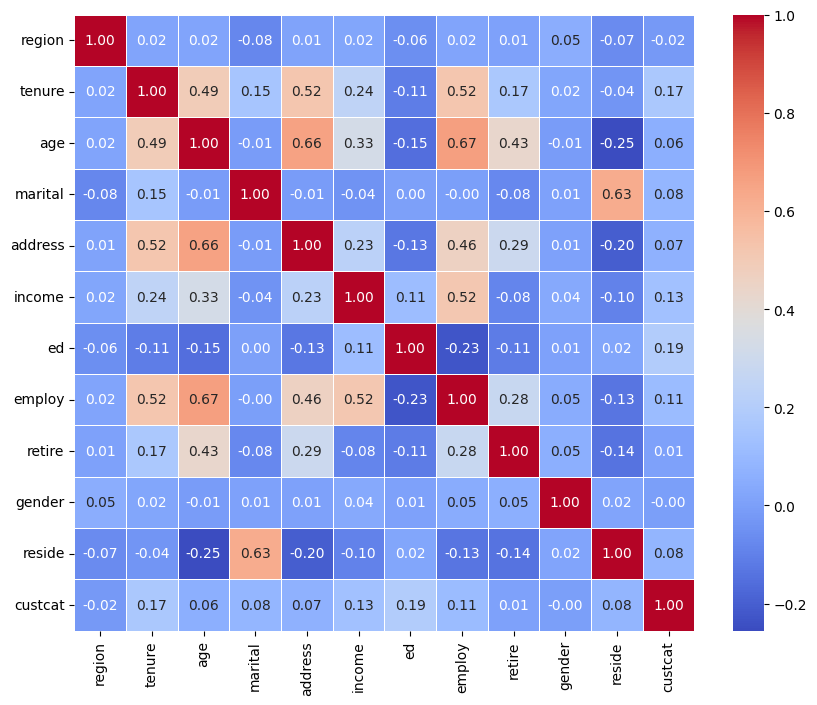

In [ ]:
# Correlation Matrix

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [ ]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

,custcat
ed,0.193864
tenure,0.166691
income,0.134525
employ,0.110011
marital,0.083836
reside,0.082022
address,0.067913
age,0.056909
region,0.023771
retire,0.008908


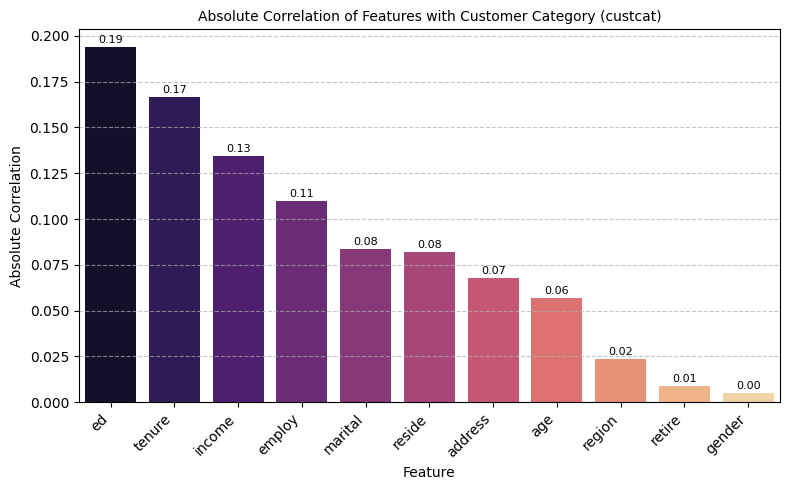

In [ ]:
# Create a bar chart for the correlation values
plt.figure(figsize=(8, 5)) # Adjust figure size for better readability of potentially more bars
sns.barplot(
    x=correlation_values.index,      # Feature names on x-axis
    y=correlation_values.values,     # Correlation values on y-axis
    palette='magma'                  # Choose a different color palette
)

# Add labels and title
plt.title('Absolute Correlation of Features with Customer Category (custcat)', fontsize=10)
plt.xlabel('Feature', fontsize=10)
plt.ylabel('Absolute Correlation', fontsize=10)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45, ha='right') # Rotate and align right

# Add correlation values on top of the bars
for i, value in enumerate(correlation_values.values):
    plt.text(i, value + 0.001, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Separate the data into the input data set and the target data set.

X = df.drop('custcat',axis=1)
y = df['custcat']

### Normalize Data

Data normalization is important for the KNN model.

KNN makes predictions based on the distance between data points (samples), i.e. for a given test point, the algorithm finds the k-nearest neighbors by measuring the distance between the test point and other data points in the dataset. By normalizing / standardizing the data, we ensure that all features contribute equally to the distance calculation. Since normalization scales each feature to have zero mean and unit variance, it puts all features on the same scale.

This helps KNN make better decisions based on the actual relationships between features, not just on the magnitude of their values.

In [ ]:
X_norm = StandardScaler().fit_transform(X)

### Train Test Split

Test with 20% of the data and the rest (80%) for training.

Assigning a random state ensures reproducibility of the results across multiple executions.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

### KNN Classification

In [ ]:
# Training - start by using a small value of k.

k = 3

knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)

In [ ]:
# Test

yhat = knn_model.predict(X_test)

### Evaluation

In [ ]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.315


### K=6

In [ ]:
k = 6
knn_model_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = knn_model_6.predict(X_test)
print("Test set Accuracy: ", accuracy_score(y_test, yhat6))

Test set Accuracy:  0.31


### Choosing the correct value of k

K in KNN, is the number of nearest neighbors to examine. The choice of the value of `k` clearly affects the model. The general way of doing this is to train the model on a set of different values of k and noting the performance of the trained model on the testing set. The model with the best value of `accuracy_score` is the one with the ideal value of the parameter k.

In [ ]:
Ks = 50
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

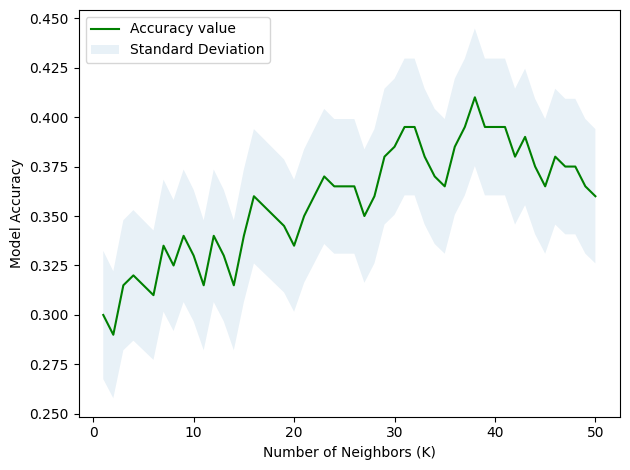

The best accuracy was with 0.41 with k = 38


In [ ]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1)

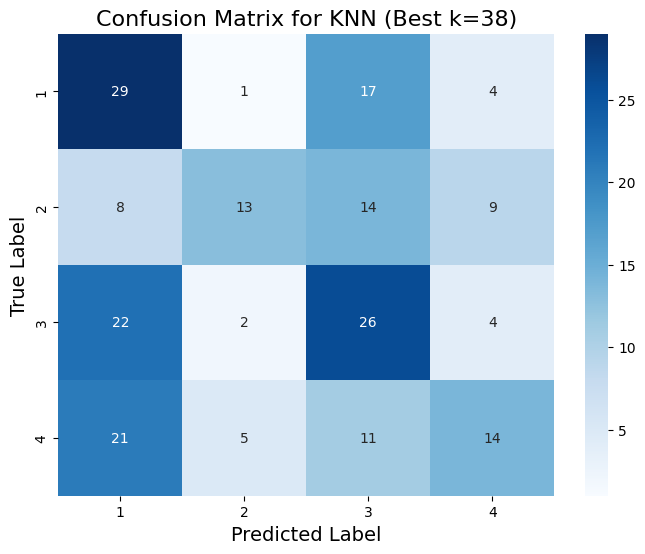


Classification Report for Best K (38):

              precision    recall  f1-score   support

           1       0.36      0.57      0.44        51
           2       0.62      0.30      0.40        44
           3       0.38      0.48      0.43        54
           4       0.45      0.27      0.34        51

    accuracy                           0.41       200
   macro avg       0.45      0.41      0.40       200
weighted avg       0.45      0.41      0.40       200



In [ ]:
# Train the KNN Model specifically with the identified best K
best_k = acc.argmax()+1

knn_best_model = KNeighborsClassifier(n_neighbors=best_k)
knn_best_model.fit(X_train, y_train)

# Make Predictions on the Test Set using the best model
yhat_best_k = knn_best_model.predict(X_test)

# Calculate the Confusion Matrix
cm = confusion_matrix(y_test, yhat_best_k)

# Get unique class labels for clearer plotting and ensure labels are sorted.
class_labels = sorted(np.unique(y))

# --- 6. Plot the Confusion Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d', # Format as integer counts
    cmap='Blues', # Color map for the heatmap
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=True # Show color bar
)
plt.title(f'Confusion Matrix for KNN (Best k={best_k})', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Print Classification Report for more detailed metrics
print(f"\nClassification Report for Best K ({best_k}):\n")
print(classification_report(y_test, yhat_best_k, target_names=[str(label) for label in class_labels]))

## Random Forests and XGBoost


Ensemble learning is a machine learning technique that combines the predictions from multiple individual models (often called "base learners" or "weak learners") to produce a more accurate and robust final prediction than any single model could achieve on its own. The core idea is that by leveraging the collective wisdom of diverse models, the ensemble can reduce errors, mitigate biases, and improve generalization.

**Random Forests** - A method that builds a "forest" of multiple decision trees, each tree is trained on a random subset of the data (bootstrapping) and considers a random subset of features for splitting at each node. For classification, the final prediction is determined by a majority vote of the trees, while for regression, it's the average of their predictions. This randomness helps to reduce overfitting and improve the model's generalization ability.

**XGBoost** (eXtreme Gradient Boosting) - An optimized and highly efficient implementation of gradient boosting. XGBoost builds trees sequentially. Each new tree attempts to correct the errors (residuals) of the previously built trees. XGBoost is known for its speed, scalability, and strong performance due to optimizations like regularization to prevent overfitting, handling missing values, and parallel processing.

In [2]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

### DATA

House prices - the California Housing Dataset, from sklearn.

In [3]:
# Load the California Housing dataset

data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))

Number of Observations: 20640
Number of Features: 8


### Initialize models

In [5]:
# Initialize models

n_estimators=100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [6]:
# Fit models

# Measure training time for Random Forest
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

# Measure training time for XGBoost
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

In [7]:
# Test

# Measure prediction time for Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

In [8]:
# Evaluate

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [10]:
print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')



Random Forest:  MSE = 0.2554, R^2 = 0.8051
      XGBoost:  MSE = 0.2226, R^2 = 0.8301
Random Forest:  Training Time = 18.601 seconds, Testing time = 0.161 seconds
      XGBoost:  Training Time = 0.419 seconds, Testing time = 0.010 seconds


In [12]:
# Standard deviation of y_test
std_y = np.std(y_test)

start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')
std_y = np.std(y_test)

Random Forest:  MSE = 0.2554, R^2 = 0.8051
      XGBoost:  MSE = 0.2226, R^2 = 0.8301
Random Forest:  Training Time = 18.601 seconds, Testing time = 0.349 seconds
      XGBoost:  Training Time = 0.419 seconds, Testing time = 0.024 seconds


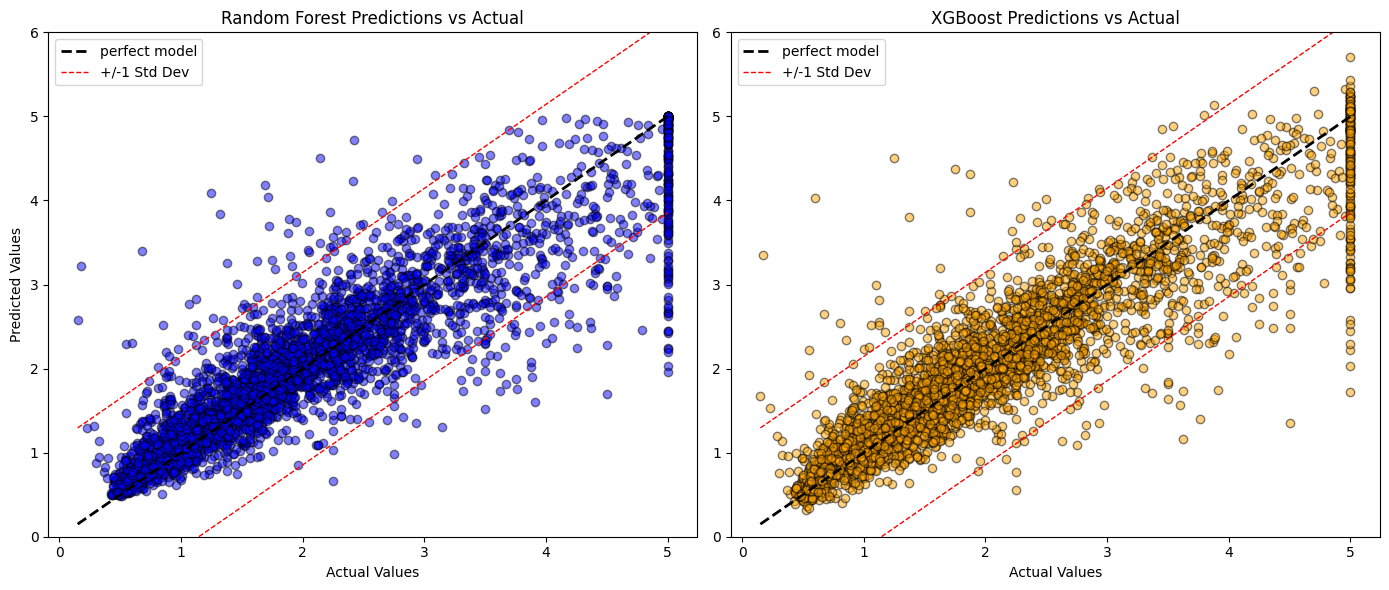

In [13]:
plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

Both models performed very well. Most of their predictions fall within a standard deviation of the target.